# Регрессия 

$Регрессия$ - это процесс оценки того, как соотносятся между собой входные и выходные пременные. Следует отметить, что выходные переменные могут иметь значения из непрерывного ряда вещественных чисел. (В процессе классификации количество выходных классов фиксировано)

В регрессии предпологается, что выходные переменные зависят от входных, и наша задача заключается в выяснении соотношения между ними. Отсюда входные переменные называют $независимыми$ $переменными$ (или $предикторами$), а входные - $зависимыми$ (или $критериальными$ $пременными$). При этом вовсе не требуется, чтобы входные переменные были независимыми друг от друга. Существует множество ситуаций, когда между входными переменныи существует корреляция.

Регрессионный анализ позволяет выяснить, как изменяется значение выходной переменной, когда мы изменяем лишь часть входных переменных, оставляя остальные входные перменные фиксированными. В случае линейной регрессии преполагается, что входные и выходные переменные связаны между собой линейной зависимостью.

Иногда линейной регрессии оказывается недостаточно для объяснения соотношений между входными и выходными переменными. В подобных случаях мы используем $полиномиальную$ $регрессию$, в которой входные и выходные перемнные свзяанны между собой полиномиальной зависимостью. Этот подход более сложен, но он обеспечивает более высокую точность.

Выбор вида регресии для выявления указанных соотношений определяется конкретикой задачи. Регрессию часто используют для прогнозирования цен, экономических показателей и т.п.

## Создание регрессора одной переменной

In [1]:
import pickle

import numpy as np
from sklearn import linear_model
import sklearn.metrics as sm
import matplotlib.pyplot as plt

In [2]:
#входной файл, содержащий данные 
input_file = 'data_singlevar_regr.txt'

In [3]:
'''в качестве разделителя используется запятая'''
#загрузка данных
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

In [4]:
'''Разобьем данные на обучающий и тестовый наборы'''
#разбивка данных на обучающий и тестовый наборы
num_training = int(0.8 * len(X))
num_test = len(X) - num_training

#тренировочные данные
X_train, y_train = X[:num_training], y[:num_training]

#тестовые данные
X_test, y_test = X[num_training:], y[num_training:]

In [5]:
'''Создадим объект линейного регрессора и обучим его, используя 
тренировочные данные'''
#создание объекта линейного регрессора
regressor = linear_model.LinearRegression()

#обучение модели с использованием обучающего набора
regressor.fit(X_train, y_train)

LinearRegression()

In [6]:
'''Спрогрнозируем результат для тестового набора данных,
используя обучаемую модель'''
#прогнозирование результата
y_test_pred = regressor.predict(X_test)

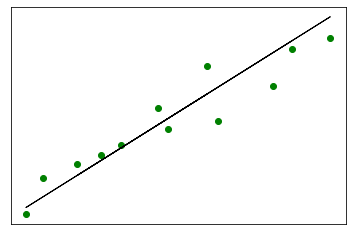

In [7]:
'''Построим выходной график'''
#построение графика
plt.scatter(X_test, 
            y_test, 
            color = 'green')

plt.plot(X_test, 
         y_test_pred, 
         color = 'black', 
         linewidth = 1)

plt.xticks(())
plt.yticks(())

plt.show()

In [8]:
'''Вычислим метрические характеристики регрессора, сравнивая
истинные значения с предсказанными'''
#Вычисление метрических характеристик
print('Linear regressor perfomance:')

print('\tMean absolute error =', 
      round(sm.mean_absolute_error(y_test, y_test_pred), 2))
print('\tMean squared error =', 
      round(sm.mean_squared_error(y_test, y_test_pred), 2))
print('\tMedian absolute error =', 
      round(sm.median_absolute_error(y_test, y_test_pred), 2))
print('\tExplain variance score =', 
      round(sm.explained_variance_score(y_test, y_test_pred), 2))
print('\tR2 score =', 
      round(sm.r2_score(y_test, y_test_pred), 2))

Linear regressor perfomance:
	Mean absolute error = 0.59
	Mean squared error = 0.49
	Median absolute error = 0.51
	Explain variance score = 0.86
	R2 score = 0.86
